**UMD Global C3: Professional Certificate Program in Data Science and Business Analytics- University of Maryland June 2022 (Global)<br/>
Course Project: Mobile App Efficacy<br/><br/>**
Due November 22, 2022<br/>
Name: LAP MINH NHAN<br/>
Email ID: yanmingli1988@gmail.com

# Part I - Data Preparation and Wrangling 

In [127]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.stats import ttest_ind

In [128]:
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:,.2f}".format
plt.style.use('seaborn-whitegrid')

In [130]:
#Load the dataset
df = pd.read_csv (r'G:\SelfStudy\uPGrad\Learning\Course 3\Module 9 Project\data_app.csv')
df.head()

,CustomerID,Adopt,Gender,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending
0,1001,1,Male,34,1,2,57,1,18,5760
1,1002,1,Female,36,1,2,5,1,6,1830
2,1003,1,Female,43,1,1,12,1,9,2682
3,1004,1,Male,47,1,1,70,1,21,6846
4,1005,1,Male,41,1,2,13,1,11,3377


In [131]:
#Check for NaN under an entire DataFrame
df.isnull().values.any()

#Replace Nationality from "0", "1" to "Not US resident" and "US resident"
df['Nationality'].mask(df['Nationality'] == 0, 'Not US resident', inplace=True)
df['Nationality'].mask(df['Nationality'] == 1, 'US resident', inplace=True)

#Replace Loyalty membership from [1, 2, 3, 4] to ['Basic','Silver','Gold','Platinum']
df['Loyalty'].mask(df['Loyalty'] == 1, 'Basic', inplace=True)
df['Loyalty'].mask(df['Loyalty'] == 2, 'Silver', inplace=True)
df['Loyalty'].mask(df['Loyalty'] == 3, 'Gold', inplace=True)
df['Loyalty'].mask(df['Loyalty'] == 4, 'Platinum', inplace=True)

#Replace Post period from [0, 1] to ['Before','After']
df['Post'].mask(df['Post'] == 0, 'Before', inplace=True)
df['Post'].mask(df['Post'] == 1, 'After', inplace=True)

# Part II: Exploratory Data Analysis

## 2.1. Univariate Analysis I

### 2.1.1. Demographics - Bar chart to display number of customers by Gender and Nationality

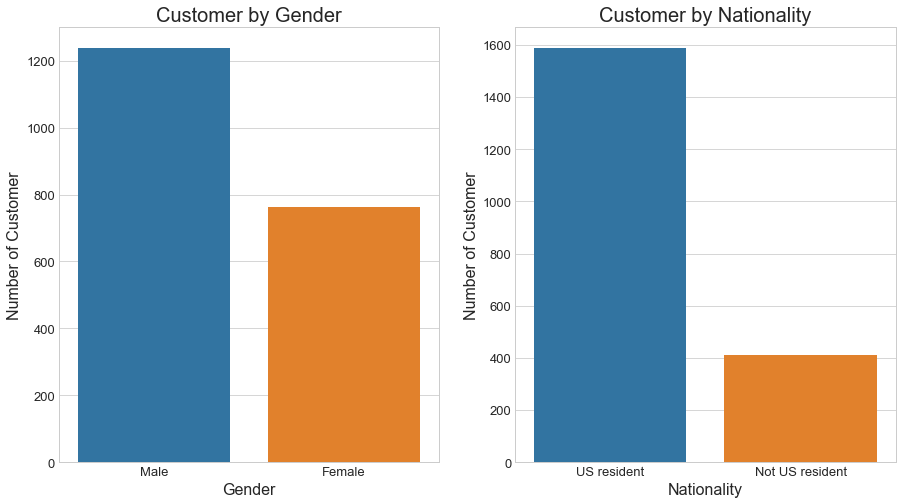

In [132]:
#Prepare sub data frame
df_gender = df_before['Gender'].value_counts().rename_axis('Gender').reset_index(name='Counts')
df_nationality = df_before['Nationality'].value_counts().rename_axis('Nationality').reset_index(name='Counts')

#Create bar chart for Analysis by Gender
fig1 = plt.figure(figsize=(15,8))
ax211g = fig1.add_subplot(1, 2, 1)
ax211g = sns.barplot(x=df_gender["Gender"], y=df_gender["Counts"])
#Specify axis labels
ax211g.axes.set_title("Customer by Gender",fontsize=20)
ax211g.set_xlabel("Gender",fontsize=16)
ax211g.set_ylabel("Number of Customer",fontsize=16)
ax211g.tick_params(labelsize=13)

#Create bar chart for Analysis by Nationality
ax211n = fig1.add_subplot(1, 2, 2)
ax211n = sns.barplot(x=df_nationality["Nationality"], y=df_nationality["Counts"])
#Specify axis labels
ax211n.axes.set_title("Customer by Nationality",fontsize=20)
ax211n.set_xlabel("Nationality",fontsize=16)
ax211n.set_ylabel("Number of Customer",fontsize=16)
ax211n.tick_params(labelsize=13)

### 2.1.2. Demographics - Histogram chart to display number of customers distributed by age

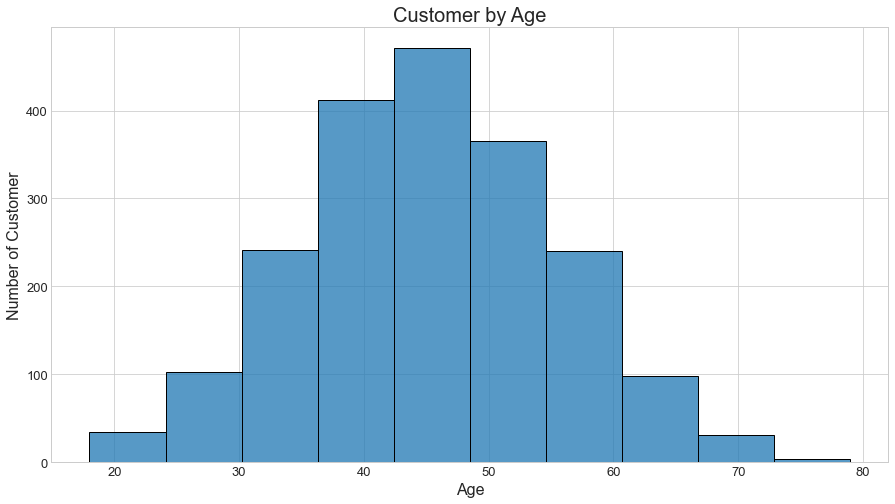

In [135]:
plt.figure(figsize=(15,8))
ax212 = sns.histplot(data=df_before, x="Age", bins=10)

#Specify axis labels
ax212.axes.set_title("Customer by Age",fontsize=20)
ax212.set_xlabel("Age",fontsize=16)
ax212.set_ylabel("Number of Customer",fontsize=16)
ax212.tick_params(labelsize=13)

#display barplot
plt.show(ax212)

### 2.1.3. Loyalty membership and tenure with the hotel chain (in months)

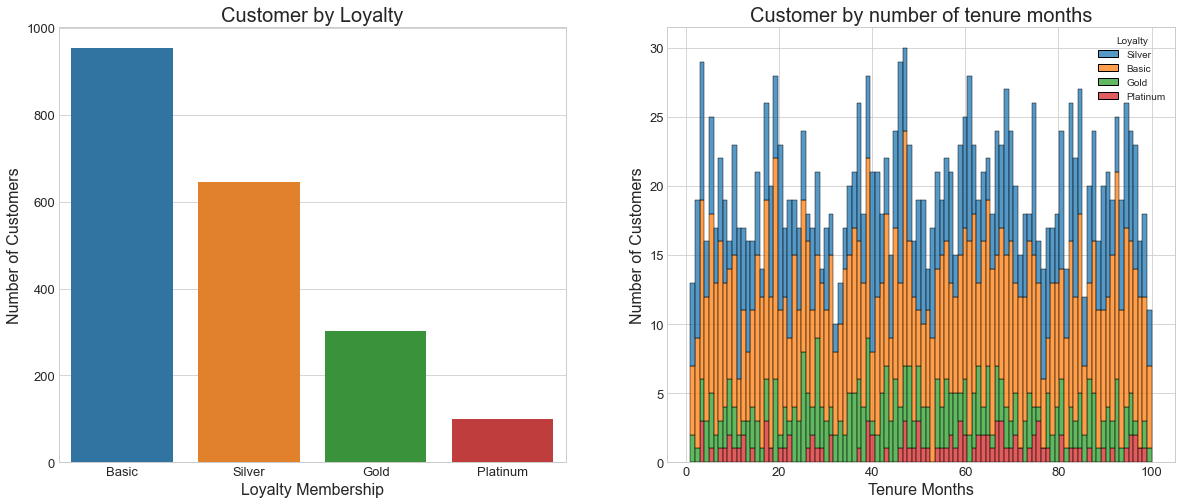

In [136]:
#Prepare sub data frame
df_loyalmem = df_before['Loyalty'].value_counts().rename_axis('Loyalty').reset_index(name='Counts')

#Create bar chart
fig2 = plt.figure(figsize=(20,8))
ax213l = fig2.add_subplot(1, 2, 1)
ax213l = sns.barplot(x=df_loyalmem["Loyalty"], y=df_loyalmem["Counts"])

#Specify axis labels for bar chart
ax213l.axes.set_title("Customer by Loyalty",fontsize=20)
ax213l.set_xlabel("Loyalty Membership",fontsize=16)
ax213l.set_ylabel("Number of Customers",fontsize=16)
ax213l.tick_params(labelsize=13)

#Create histogram chart
ax213t= fig2.add_subplot(1, 2, 2)
ax213t = sns.histplot(data=df_before, x="Tenure", bins=100, hue = 'Loyalty', multiple="stack")

#Specify axis labels for histogram chart
ax213t.axes.set_title("Customer by number of tenure months",fontsize=20)
ax213t.set_xlabel("Tenure Months",fontsize=16)
ax213t.set_ylabel("Number of Customers",fontsize=16)
ax213t.tick_params(labelsize=13)

## 2.2. Univariate Analysis II

In [137]:
# Define function to format number
def millions(x, pos):
    """The two args are the value and tick position."""
    return '${:1.1f}M'.format(x*1e-6)

### 2.2.1. Bar chart to display the different between before/after the app’s adoption by Spending Amount and Gender

In [138]:
# Prepare sub data frame
df_before = df[df['Post'] == 'Before']
df_after = df[df['Post'] == 'After']
## Pivot table by Gender
dfb_gender = pd.pivot_table(df_before, index=['Gender'], aggfunc='sum')
dfa_gender = pd.pivot_table(df_after, index=['Gender'], aggfunc='sum')

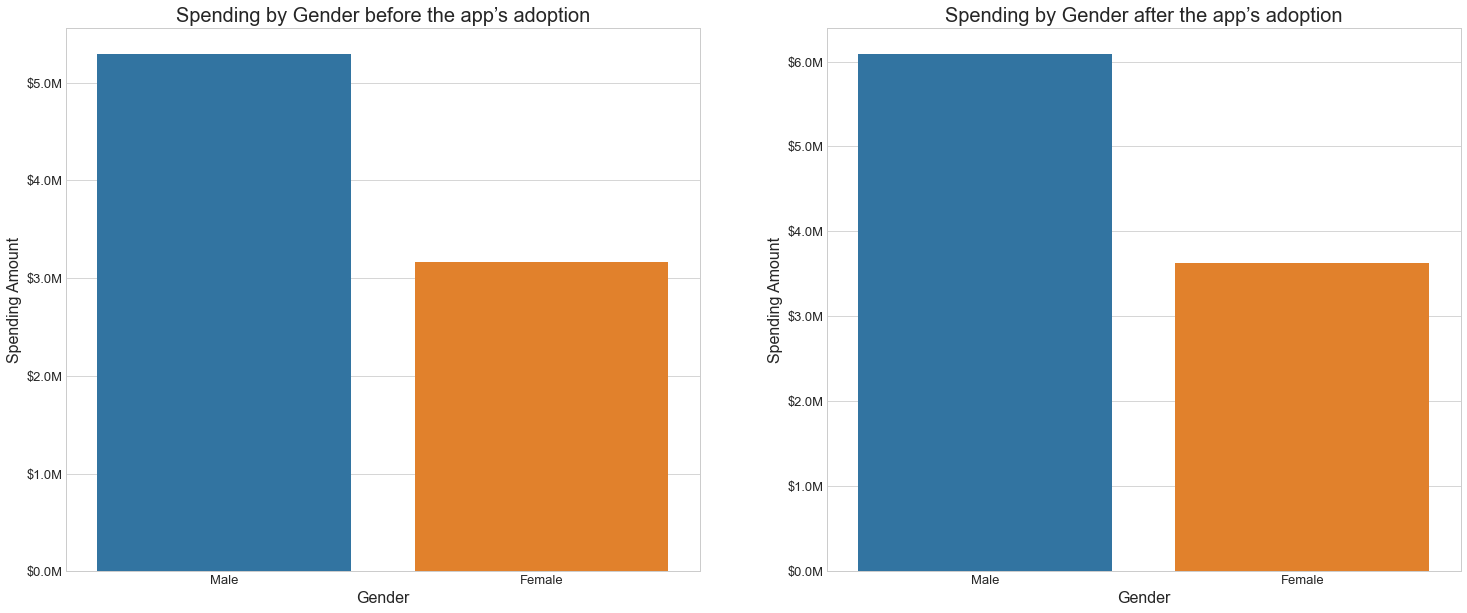

In [139]:
#Create bar chart for analysis Spending by Gender before the app’s adoption
fig2 = plt.figure(figsize=(25,10))
ax221sgb = fig2.add_subplot(1, 2, 1)
ax221sgb = sns.barplot(x=dfb_gender.index, y=dfb_gender.Spending, order=["Male", "Female"])
#Specify axis labels
ax221sgb.axes.set_title("Spending by Gender before the app’s adoption",fontsize=20)
ax221sgb.set_xlabel("Gender",fontsize=16)
ax221sgb.set_ylabel("Spending Amount",fontsize=16)
ax221sgb.yaxis.set_major_formatter(millions)
ax221sgb.tick_params(labelsize=13)

#Create bar chart for analysis Spending by Gender after the app’s adoption
ax221sga = fig2.add_subplot(1, 2, 2)
ax221sga = sns.barplot(x=dfa_gender.index, y=dfa_gender.Spending, order=["Male", "Female"])
#Specify axis labels
ax221sga.axes.set_title("Spending by Gender after the app’s adoption",fontsize=20)
ax221sga.set_xlabel("Gender",fontsize=16)
ax221sga.set_ylabel("Spending Amount",fontsize=16)
ax221sga.yaxis.set_major_formatter(millions)
ax221sga.tick_params(labelsize=13)

### 2.2.2. Bar chart to display the different between before/after the app’s adoption by Number of bookings and Gender

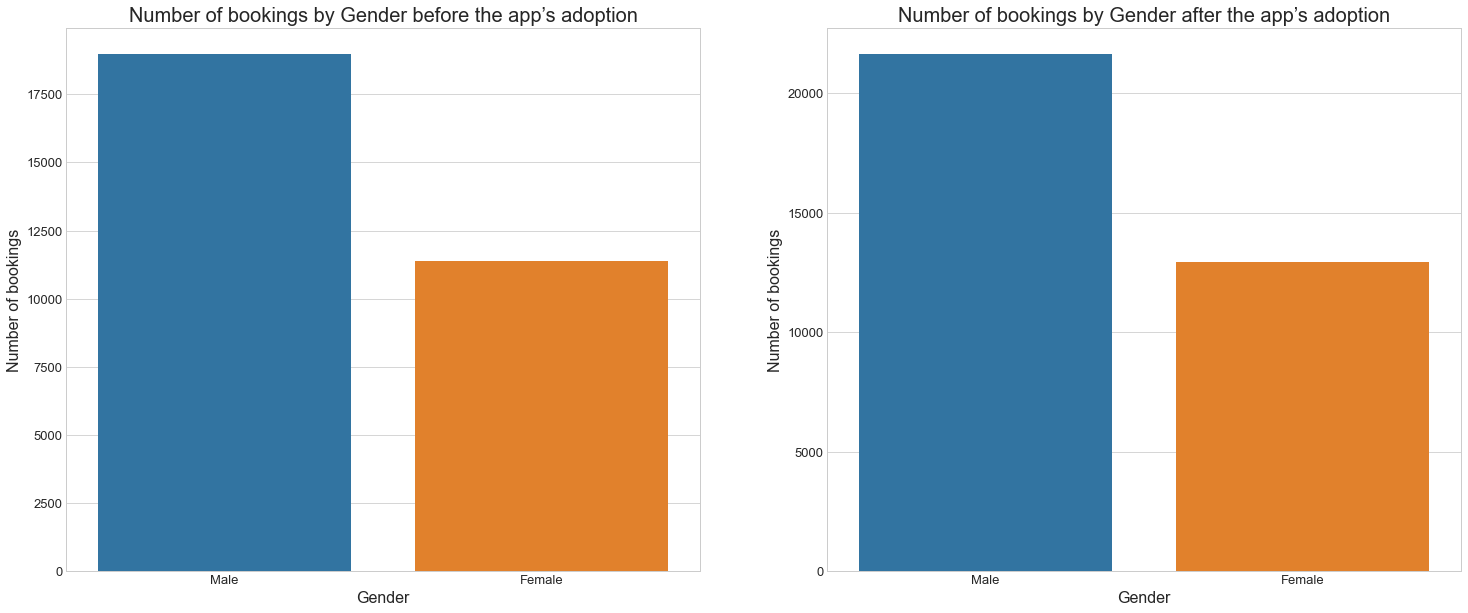

In [140]:
#Create bar chart for analysis Number of bookings by Gender before the app’s adoption
fig21 = plt.figure(figsize=(25,10))
ax222ngb = fig21.add_subplot(1, 2, 1)
ax222ngb = sns.barplot(x=dfb_gender.index, y=dfb_gender.NumBookings, order=["Male", "Female"])
#Specify axis labels
ax222ngb.axes.set_title("Number of bookings by Gender before the app’s adoption",fontsize=20)
ax222ngb.set_xlabel("Gender",fontsize=16)
ax222ngb.set_ylabel("Number of bookings",fontsize=16)
ax222ngb.tick_params(labelsize=13)

#Create bar chart for analysis Number of bookings by Gender after the app’s adoption
ax222nga = fig21.add_subplot(1, 2, 2)
ax222nga = sns.barplot(x=dfa_gender.index, y=dfa_gender.NumBookings, order=["Male", "Female"])
#Specify axis labels
ax222nga.axes.set_title("Number of bookings by Gender after the app’s adoption",fontsize=20)
ax222nga.set_xlabel("Gender",fontsize=16)
ax222nga.set_ylabel("Number of bookings",fontsize=16)
ax222nga.tick_params(labelsize=13)

### 2.2.3. Bar chart to display the different between before/after the app’s adoption by Spending Amount and Nationality

In [141]:
# Prepare sub data frame
## Pivot table by Nationality
dfb_spending_nat = pd.pivot_table(df_before, index=['Nationality'], aggfunc='sum')
dfa_spending_nat = pd.pivot_table(df_after, index=['Nationality'], aggfunc='sum')

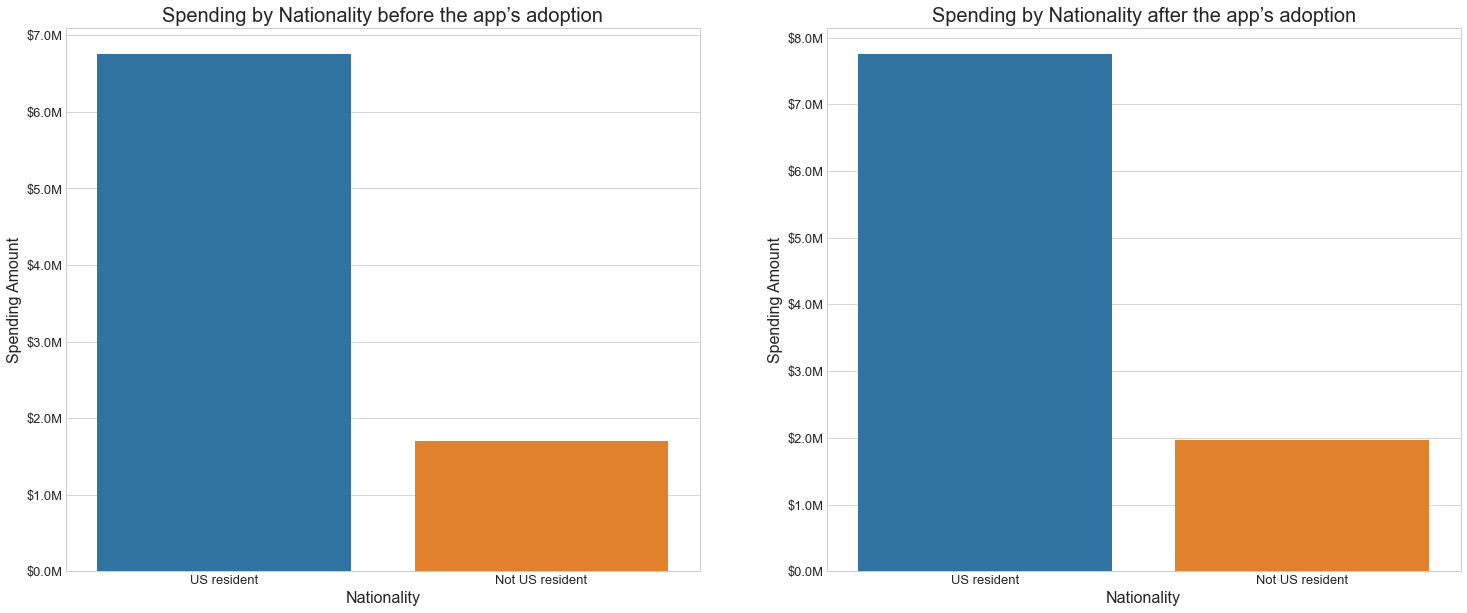

In [142]:
#Create bar chart for analysis Spending by Nationality before the app’s adoption
fig3 = plt.figure(figsize=(25,10))
ax223snb = fig3.add_subplot(1, 2, 1)
ax223snb = sns.barplot(x=dfb_spending_nat.index, y=dfb_spending_nat.Spending, order=["US resident", "Not US resident"])
#Specify axis labels
ax223snb.axes.set_title("Spending by Nationality before the app’s adoption",fontsize=20)
ax223snb.set_xlabel("Nationality",fontsize=16)
ax223snb.set_ylabel("Spending Amount",fontsize=16)
ax223snb.yaxis.set_major_formatter(millions)
ax223snb.tick_params(labelsize=13)

#Create bar chart for analysis Spending by Nationality after the app’s adoption
ax223sna = fig3.add_subplot(1, 2, 2)
ax223sna = sns.barplot(x=dfa_spending_nat.index, y=dfa_spending_nat.Spending, order=["US resident", "Not US resident"])
#Specify axis labels
ax223sna.axes.set_title("Spending by Nationality after the app’s adoption",fontsize=20)
ax223sna.set_xlabel("Nationality",fontsize=16)
ax223sna.set_ylabel("Spending Amount",fontsize=16)
ax223sna.yaxis.set_major_formatter(millions)
ax223sna.tick_params(labelsize=13)

### 2.2.4. Bar chart to display the different between before/after the app’s adoption by Number of bookings and Nationality

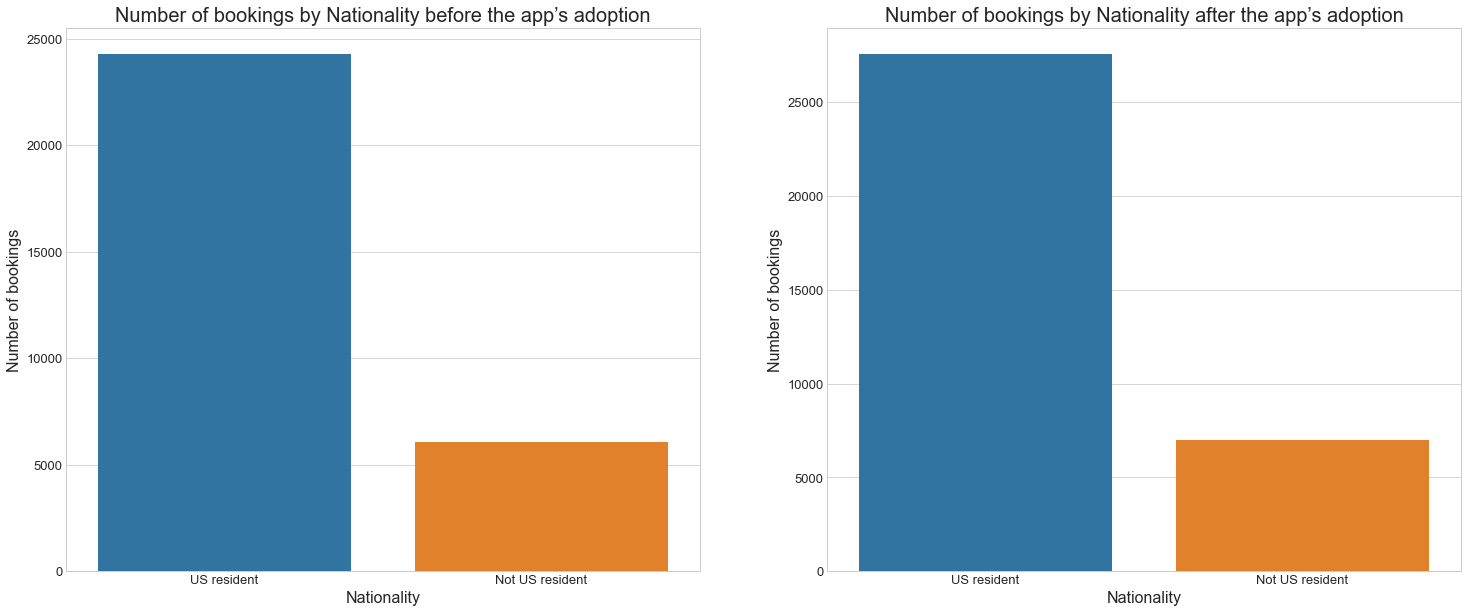

In [143]:
#Create bar chart for analysis Number of bookings by Nationality before the app’s adoption
fig31 = plt.figure(figsize=(25,10))
ax224nnb = fig31.add_subplot(1, 2, 1)
ax224nnb = sns.barplot(x=dfb_spending_nat.index, y=dfb_spending_nat.NumBookings, order=["US resident", "Not US resident"])
#Specify axis labels
ax224nnb.axes.set_title("Number of bookings by Nationality before the app’s adoption",fontsize=20)
ax224nnb.set_xlabel("Nationality",fontsize=16)
ax224nnb.set_ylabel("Number of bookings",fontsize=16)
ax224nnb.tick_params(labelsize=13)

#Create bar chart for analysis Number of bookings by Nationality after the app’s adoption
ax224nna = fig31.add_subplot(1, 2, 2)
ax224nna = sns.barplot(x=dfa_spending_nat.index, y=dfa_spending_nat.NumBookings, order=["US resident", "Not US resident"])
#Specify axis labels
ax224nna.axes.set_title("Number of bookings by Nationality after the app’s adoption",fontsize=20)
ax224nna.set_xlabel("Nationality",fontsize=16)
ax224nna.set_ylabel("Number of bookings",fontsize=16)
ax224nna.tick_params(labelsize=13)

### 2.2.5. Bar chart to display the different between before/after the app’s adoption by Spending Amount and Loyalty Membership

In [144]:
# Prepare sub data frame
## Pivot table by Loyalty Membership
dfb_spending_loyalty = pd.pivot_table(df_before, index=['Loyalty'], aggfunc='sum')
dfa_spending_loyalty = pd.pivot_table(df_after, index=['Loyalty'], aggfunc='sum')

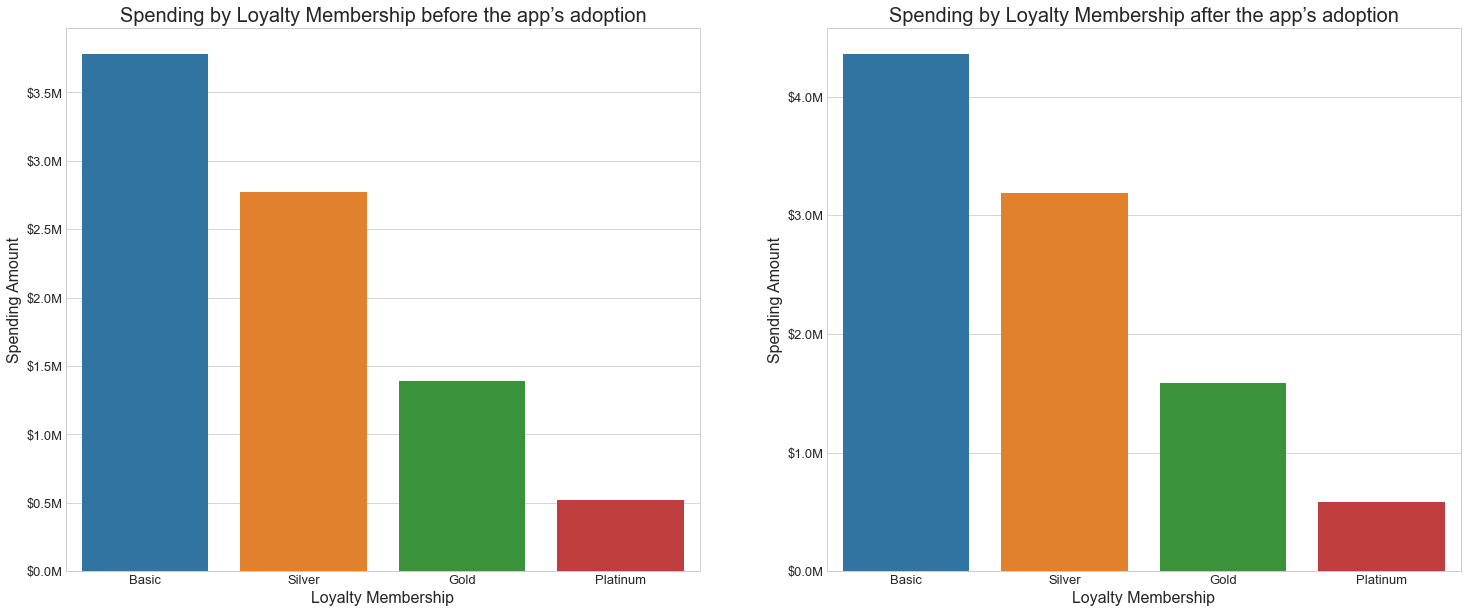

In [145]:
#Create bar chart for analysis Spending by Loyalty Membership before the app’s adoption
fig4 = plt.figure(figsize=(25,10))
ax225slb = fig4.add_subplot(1, 2, 1)
ax225slb = sns.barplot(x=dfb_spending_loyalty.index, y=dfb_spending_loyalty.Spending, order=["Basic", "Silver", "Gold", "Platinum"])
#Specify axis labels
ax225slb.axes.set_title("Spending by Loyalty Membership before the app’s adoption",fontsize=20)
ax225slb.set_xlabel("Loyalty Membership",fontsize=16)
ax225slb.set_ylabel("Spending Amount",fontsize=16)
ax225slb.yaxis.set_major_formatter(millions)
ax225slb.tick_params(labelsize=13)

#Create bar chart for analysis Spending by Loyalty Membership after the app’s adoption
ax225sla = fig4.add_subplot(1, 2, 2)
ax225sla = sns.barplot(x=dfa_spending_loyalty.index, y=dfa_spending_loyalty.Spending, order=["Basic", "Silver", "Gold", "Platinum"])
#Specify axis labels
ax225sla.axes.set_title("Spending by Loyalty Membership after the app’s adoption",fontsize=20)
ax225sla.set_xlabel("Loyalty Membership",fontsize=16)
ax225sla.set_ylabel("Spending Amount",fontsize=16)
ax225sla.yaxis.set_major_formatter(millions)
ax225sla.tick_params(labelsize=13)

### 2.2.6. Bar chart to display the different between before/after the app’s adoption by Number of bookings and Loyalty Membership

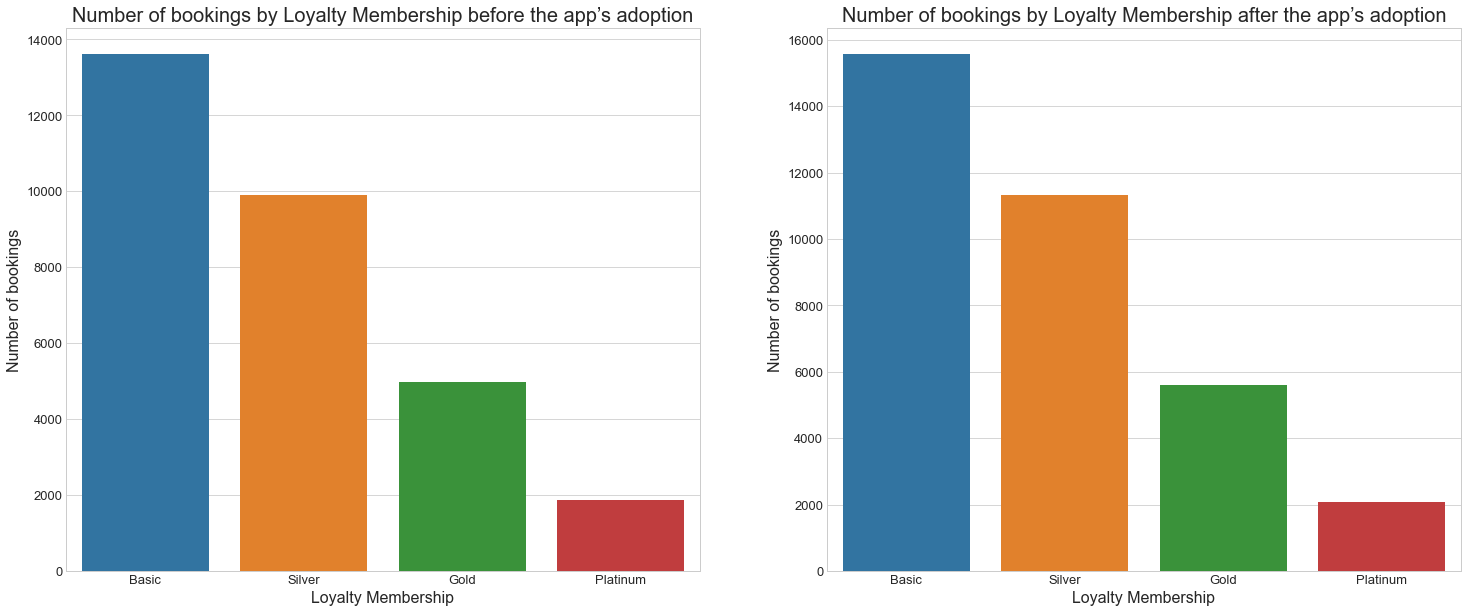

In [146]:
#Create bar chart for analysis Number of bookings by Loyalty Membership before the app’s adoption
fig41 = plt.figure(figsize=(25,10))
ax226nlb = fig41.add_subplot(1, 2, 1)
ax226nlb = sns.barplot(x=dfb_spending_loyalty.index, y=dfb_spending_loyalty.NumBookings, order=["Basic", "Silver", "Gold", "Platinum"])
#Specify axis labels
ax226nlb.axes.set_title("Number of bookings by Loyalty Membership before the app’s adoption",fontsize=20)
ax226nlb.set_xlabel("Loyalty Membership",fontsize=16)
ax226nlb.set_ylabel("Number of bookings",fontsize=16)
ax226nlb.tick_params(labelsize=13)

#Create bar chart for analysis Number of bookings by Loyalty Membership after the app’s adoption
ax226nla = fig41.add_subplot(1, 2, 2)
ax226nla = sns.barplot(x=dfa_spending_loyalty.index, y=dfa_spending_loyalty.NumBookings, order=["Basic", "Silver", "Gold", "Platinum"])
#Specify axis labels
ax226nla.axes.set_title("Number of bookings by Loyalty Membership after the app’s adoption",fontsize=20)
ax226nla.set_xlabel("Loyalty Membership",fontsize=16)
ax226nla.set_ylabel("Number of bookings",fontsize=16)
ax226nla.tick_params(labelsize=13)

## 2.3. Multivariate Analysis

### 2.3.1. Spending by Age before/after the app's adoption

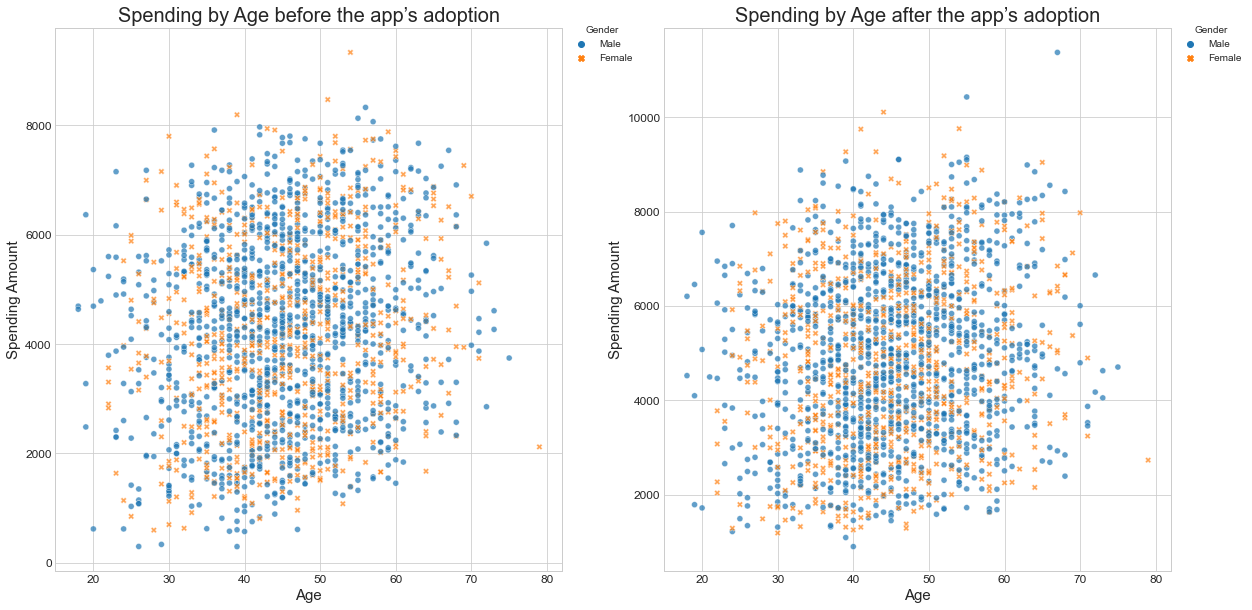

In [147]:
fig5 = plt.figure(figsize=(20,10))
ax231sab = fig5.add_subplot(1, 2, 1)
ax231sab = sns.scatterplot(data = df_before, y = df_before.Spending, x = df_before.Age, hue='Gender', style='Gender', alpha=0.7)
#Specify axis labels
ax231sab.axes.set_title("Spending by Age before the app’s adoption",fontsize=20)
ax231sab.set_xlabel("Age",fontsize=15)
ax231sab.set_ylabel("Spending Amount",fontsize=15)
ax231sab.tick_params(labelsize=12)
ax231sab.legend(title='Gender', bbox_to_anchor=(1, 1.02), loc='upper left')

ax231saa = fig5.add_subplot(1, 2, 2)
ax231saa = sns.scatterplot(data = df_after, y = df_after.Spending, x = df_after.Age, hue='Gender', style='Gender', alpha=0.7)
#Specify axis labels
ax231saa.axes.set_title("Spending by Age after the app’s adoption",fontsize=20)
ax231saa.set_xlabel("Age",fontsize=15)
ax231saa.set_ylabel("Spending Amount",fontsize=15)
ax231saa.tick_params(labelsize=12)
ax231saa.legend(title='Gender', bbox_to_anchor=(1, 1.02), loc='upper left')

### 2.3.2. Spending by Loyalty Membership before/after the app's adoption group by Nationality

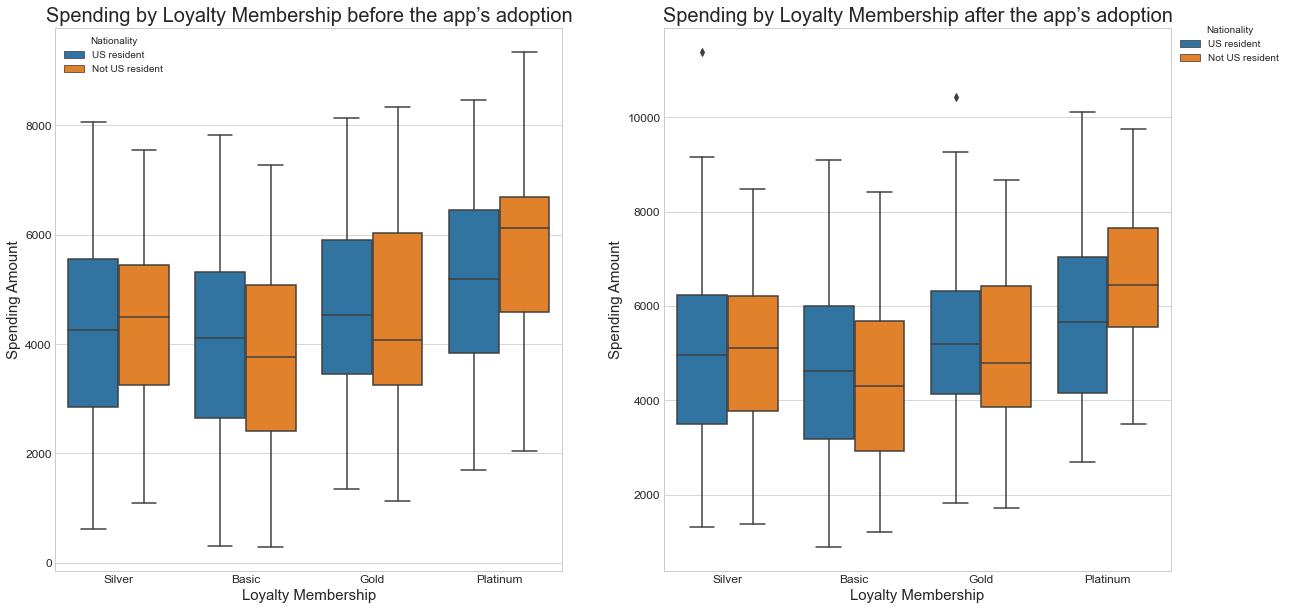

In [148]:
fig6 = plt.figure(figsize=(20,10))
ax232slb = fig6.add_subplot(1, 2, 1)
ax232slb = sns.boxplot(data = df_before, y=df_before["Spending"], x=df_before["Loyalty"], hue = 'Nationality') 
#Specify axis labels
ax232slb.axes.set_title("Spending by Loyalty Membership before the app’s adoption",fontsize=20)
ax232slb.set_xlabel("Loyalty Membership",fontsize=15)
ax232slb.set_ylabel("Spending Amount",fontsize=15)
ax232slb.tick_params(labelsize=12)
#ax232slb.legend(title='Nationality', bbox_to_anchor=(1, 1.00), loc='upper left')

ax232sla = fig6.add_subplot(1, 2, 2)
ax232sla = sns.boxplot(data = df_after, y=df_after["Spending"], x=df_after["Loyalty"], hue = 'Nationality') 
#Specify axis labels
ax232sla.axes.set_title("Spending by Loyalty Membership after the app’s adoption",fontsize=20)
ax232sla.set_xlabel("Loyalty Membership",fontsize=15)
ax232sla.set_ylabel("Spending Amount",fontsize=15)
ax232sla.tick_params(labelsize=12)
ax232sla.legend(title='Nationality', bbox_to_anchor=(1, 1.02), loc='upper left')

### 2.3.3. Generate a table of the correlations of all numerical variables of the data set. 

In [149]:
# Correlation table of Loyalty Membership and Nationality and Gender by the average Spending
df233s = pd.pivot_table(df, values=['Spending'], index=['Loyalty'], columns=['Nationality', 'Gender'], aggfunc='mean')
df233s

Spending                              
Nationality Not US resident          US resident         
Gender               Female     Male      Female     Male
Loyalty                                                  
Basic              3,876.28 4,115.96    4,382.50 4,300.68
Gold               4,328.60 4,963.12    4,795.62 5,092.30
Platinum           7,206.60 5,645.83    5,471.89 5,466.40
Silver             4,512.50 4,821.56    4,385.99 4,710.73

In [150]:
# Correlation table of Loyalty Membership and Nationality and Gender by the total of number bookings
df233n = pd.pivot_table(df, values=['NumBookings'], index=['Loyalty'], columns=['Nationality', 'Gender'], aggfunc='sum')
df233n

NumBookings                         
Nationality Not US resident       US resident       
Gender               Female  Male      Female   Male
Loyalty                                             
Basic                  2019  3392        9460  14344
Gold                    768  1268        3172   5392
Platinum                250   476        1384   1842
Silver                 1838  3062        5451  10867

### 2.3.4 Determine whether there is a statistically significant difference between the average spending of men and women (at a 5% significance level)? Conduct an appropriate hypothesis test to determine whether there is a difference in means. 
- Confidence interval = 95%
- Independent samples
- Constant variance.

In [154]:
# Prepare the sub dataframe
df234t = df[df.Gender == 'Male']
df234c = df[df.Gender == 'Female']

# Print out the average spending of Men and Women
print(f'The average spending of Men = {df234t.Spending.mean():,.2f}')
print(f'The average spending of Women= {df234c.Spending.mean():,.2f}')

The average spending of Men = 4,600.29
The average spending of Women= 4,461.07


#### The difference between The average spending of Men and Women is: 4,600.29 - 4,461.07 = 139.22

Our hypotheses:
> Let $\mu_0$ denote the difference between the average spending of Men (Treatment group) and Women (Control group)
$$H_0: \mu_0 = 0$$
$$H_a: \mu_a \neq 0$$
> This will be a two-sided test, with $\alpha$ = 0.05

In [155]:
# Perform the t-test for Independent Samples and equality of variance across populations
ttest_ind(df234t.Spending, df234c.Spending, equal_var=True)

Ttest_indResult(statistic=2.4018925119605847, pvalue=0.016355851334947116)

#### Here's a summary of some key output metrics

- **Test statistic**: 2.40
- **p-val**: 0.016 which is less than $\alpha$ = 0.05, indicating we can reject the null hypothesis 
- With the **p-val**: 0.016 > 0, there's significant evidence to suggest that the average spending of Men is greater than the average spending of Women

# Part III: Statistical Analysis

## 3.1. After-Only design

In [157]:
df31 = df[['Adopt', 'Post', 'Spending']].copy()
pivot_table = pd.pivot_table(df31, values='Spending', index=['Adopt'], columns=['Post'], aggfunc='mean', margins=True)
pivot_table

Post,After,Before,All
Adopt,,,
0,"4,388.34","4,188.75","4,288.55"
1,"5,336.30","4,275.59","4,805.95"
All,"4,862.32","4,232.17","4,547.25"


- The difference between the treatment (Adopt = 1) and control (Adopt = 0) groups’ spending in the period of After the app’s adoption: 5,336.30 - 4,388.34 = 947.96.
- In the "after-only" design, there is a big difference between the treatment and control group after adopting the app.
- Firstly, we can say that This is the treatment effect.

Our hypotheses:
> Let $\mu_0$ denote the difference in means for spending in treatment's and control's groups
$$H_0: \mu_0 = 0$$
$$H_a: \mu_a \neq 0$$
> This will be a two-sided test, with $\alpha$ = 0.05

In [158]:
df31 = df31[df31.Post == 'After']
df31t = df31[df31.Adopt == 1]
df31c = df31[df31.Adopt == 0]
pg.ttest(df31t.Spending, df31c.Spending, correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,12.19,1998,two-sided,0.00,"[795.5, 1100.43]",0.55,4.544e+29,1.00


#### Here's a summary of some key output metrics

- **Test statistic**: 12.19
- **p-val**: 0.00 which is less than $\alpha$ = 0.05, indicating we can reject the null hypothesis 
- **CI95%**: [795.5, 1100.43] - indicates that the difference is positive, or in other words, there's significant evidence to suggest that "App’s adopter" groups spending are higher than "Not an adopter of the app" groups spending

## 3.2. Before-After design

In [159]:
df32 = pd.pivot_table(df, values='Spending', index=['CustomerID', 'Adopt'], columns=['Post'], aggfunc='sum')
df32.reset_index(level=1, inplace=True)
df32["Diff"] = df32.After - df32.Before

In [160]:
df32t = df32[df32.Adopt==1]
df32c = df32[df32.Adopt==0]

In [161]:
print(f'The average difference between the After/Before period with Adopt = 1: Difference1 = {df32t.Diff.mean()}')
print(f'The average difference between the After/Before period with Adopt = 0: Difference0 = {df32c.Diff.mean()}')
#print(f'The difference between these two differences: Difference1 - Difference0 = ', df4t.Diff.mean() - df4c.Diff.mean())

The average difference between the After/Before period with Adopt = 1: Difference1 = 1060.711
The average difference between the After/Before period with Adopt = 0: Difference0 = 199.59


#### The difference between The average difference between the After/Before period in the treatment's group and The average difference between the After/Before period in the control's group is: 1060.71 - 199.59 = 861.12.

#### Our hypotheses:
> Let $\mu_0$ denote the difference in mean of the average difference between the After/Before period of treatment's group and control's group
$$H_0: \mu_0 = 0$$
$$H_a: \mu_a \neq 0$$
> This will be a two-sided test, with $\alpha$ = 0.05

In [162]:
pg.ttest(df32t.Diff, df32c.Diff, alternative = "two-sided", correction="False")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.29,1998,two-sided,0.00,"[805.37, 916.87]",1.35,1.212e+162,1.00


#### Here's a summary of some key output metrics

- **Test statistic**: 30.29
- **p-val**: 0.00 which is less than $\alpha$ = 0.05, indicating we can reject the null hypothesis 
- **CI95%**: [805.37, 916.87] - indicates that the difference is positive, or in other words, there's significant evidence to suggest that "App’s adopter" groups spending are higher than "Not an adopter of the app" groups spending while using newly built app.

# Part IV: Executive Summary

## Q1: Will the app lead to increased spending on the part of customers?

## Q2: How much of an increase in spending do you expect? 

## Q3: Do you expect the app’s effect on spending to vary by customers’ characteristics?